In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import calendar as cld
import matplotlib.pyplot as plt
import matplotlib.colors
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 256))
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy.stats import chi2
from numba import njit,prange
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.05  # previous pdf hatch linewidth
from matplotlib.dates import DateFormatter

from scipy.stats import linregress

In [3]:
normal_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':True, 'lonlines':2, 'latlines':2, 'abc':False, 'latlim':[43.,48.5],'lonlim':[4.,16.]}
multiplot_format = {'gridlinewidth':0.1, 'gridcolor':'gray8', 'gridalpha':0.5, 'coast':True,'borders':True ,'reso':'hi', 'labels':False, 'lonlines':2, 'latlines':2, 'abc':False, 'latlim':[43.,48.5],'lonlim':[4.,16.]}

imin = 32 ; imax = -30
jmin = 20 ; jmax = -15
ds = xr.open_dataset('/bettik/beaumetj/MARout/MAR-ERA-20C/MARgrid_EUf.nc')
lon = ds.LON[jmin:jmax,imin:imax]
lat = ds.LAT[jmin:jmax,imin:imax]
H = np.array(ds.SH[jmin:jmax,imin:imax])

In [4]:
wp_meanseason_meanT = np.load('/bettik/castelli/data/saved_data_MAR_ECEarth3/wp_meanseason_meanT.npy')[:,:,jmin:jmax,imin:imax]
origin_T=np.full(wp_meanseason_meanT.shape[1:4],np.nan)
slope_T=np.full(wp_meanseason_meanT.shape[1:4],np.nan)
pvalue_T=np.full(wp_meanseason_meanT.shape[1:4],np.nan)
for i in range(wp_meanseason_meanT.shape[3]):
    # print(str(lon)+'/'+str(les_season_maxT.shape[3]),end=' ')
    for j in range(wp_meanseason_meanT.shape[2]):
        for season in range(4):
            linregress_T = linregress(np.arange(wp_meanseason_meanT.shape[0]), wp_meanseason_meanT[:,season,j,i])
            origin_T[season][j][i] = linregress_T.intercept
            slope_T[season][j][i] = linregress_T.slope
            pvalue_T[season][j][i] = linregress_T.pvalue

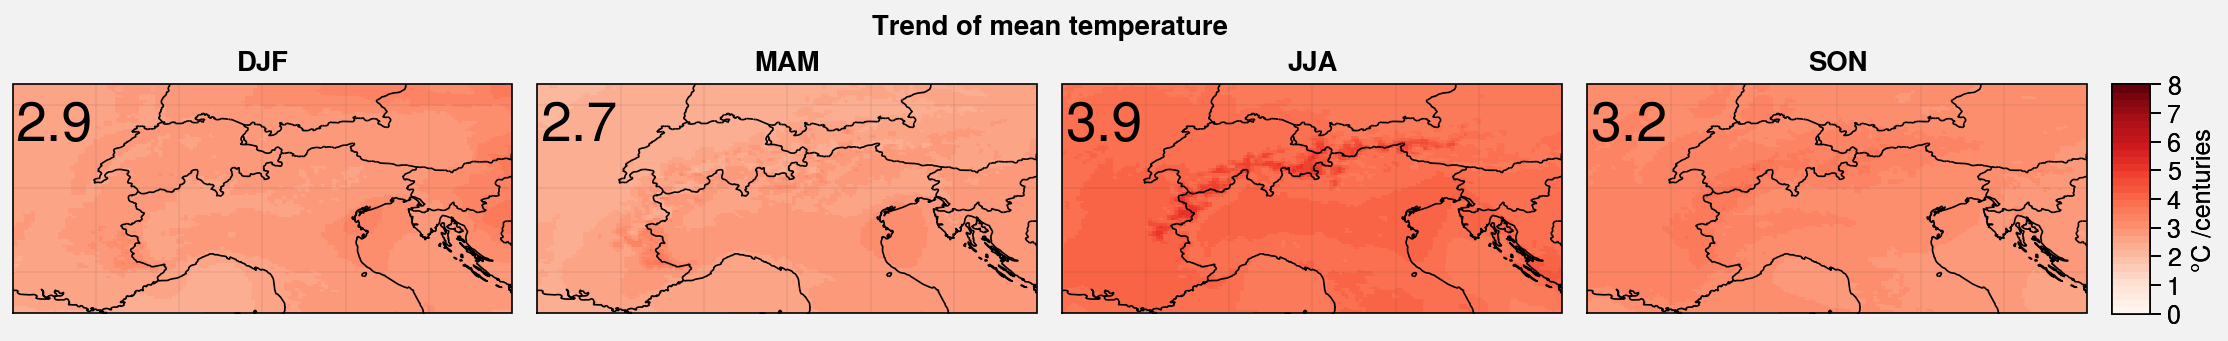

In [11]:
f, axs = pplt.subplots(proj='cyl',ncols=4)

for i in range(4):
    ax = axs[i]
    cb = ax.pcolormesh(lon,lat,100*slope_T[i],levels=np.linspace(0,8,33),cmap='Reds')#'seismic')

    ax.text(5,47.5,"{:.1f}".format(np.mean(100*slope_T[i])),ha='center',va='center',fontsize=20)

f.colorbar(cb, label= '°C /centuries',ticks=np.linspace(0,8,9))

axs.format(**multiplot_format,suptitle='Trend of mean temperature',collabels=['DJF','MAM','JJA', 'SON'])


#### Scatter plots for temperature trends as a function of altitude

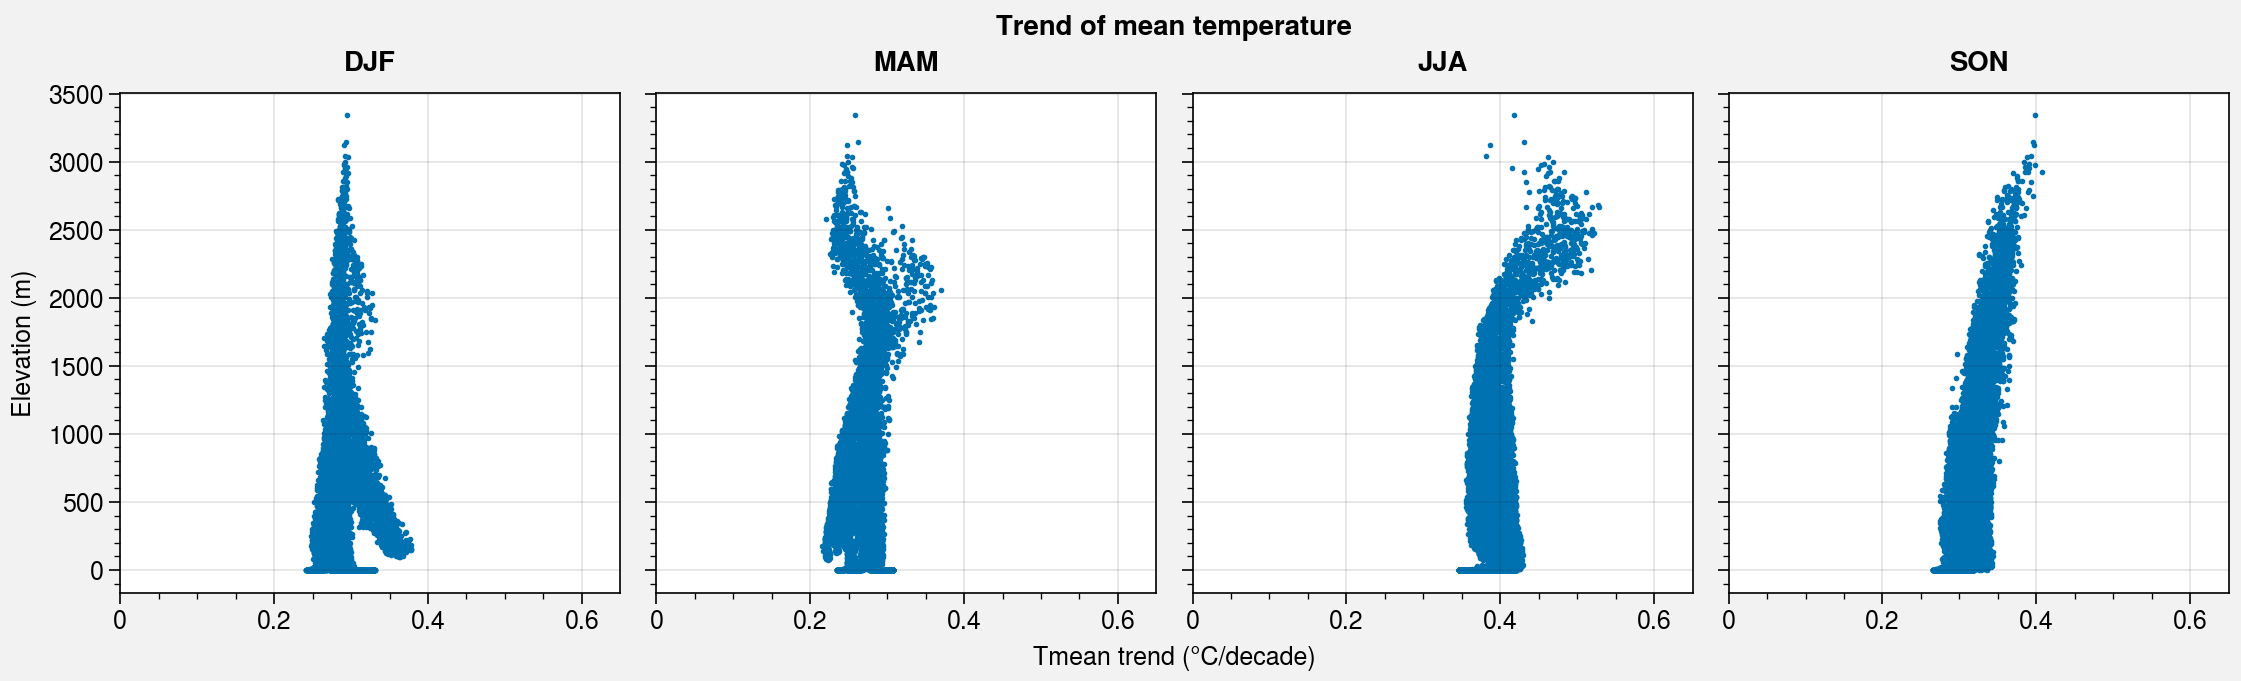

In [12]:
f, axs = pplt.subplots(ncols=4)

for i in range(4):
    ax = axs[i]
    ax.scatter(10*slope_T[i],ds.SH[jmin:jmax,imin:imax],s=2)
    ax.set_xlim((0.,0.65))
    

axs.format(suptitle='Trend of mean temperature',collabels=['DJF','MAM','JJA', 'SON'],xlabel='Tmean trend (°C/decade)',ylabel='Elevation (m)')

In [13]:
wp_meanseason_meanT_hist = wp_meanseason_meanT[:54,:,:,:]
wp_meanseason_meanT_fut = wp_meanseason_meanT[55:,:,:,:]

origin_T_hist=np.full(wp_meanseason_meanT_hist.shape[1:4],np.nan)
slope_T_hist=np.full(wp_meanseason_meanT_hist.shape[1:4],np.nan)
pvalue_T_hist=np.full(wp_meanseason_meanT_hist.shape[1:4],np.nan)

origin_T_fut=np.full(wp_meanseason_meanT_fut.shape[1:4],np.nan)
slope_T_fut=np.full(wp_meanseason_meanT_fut.shape[1:4],np.nan)
pvalue_T_fut=np.full(wp_meanseason_meanT_fut.shape[1:4],np.nan)

for i in range(wp_meanseason_meanT.shape[3]):
    # print(str(lon)+'/'+str(les_season_maxT.shape[3]),end=' ')
    for j in range(wp_meanseason_meanT.shape[2]):
        for season in range(4):
            linregress_T_hist = linregress(np.arange(wp_meanseason_meanT_hist.shape[0]), wp_meanseason_meanT_hist[:,season,j,i])
            origin_T_hist[season][j][i] = linregress_T_hist.intercept
            slope_T_hist[season][j][i] = linregress_T_hist.slope
            pvalue_T_hist[season][j][i] = linregress_T_hist.pvalue
            
            linregress_T_fut = linregress(np.arange(wp_meanseason_meanT_fut.shape[0]), wp_meanseason_meanT_fut[:,season,j,i])
            origin_T_fut[season][j][i] = linregress_T_fut.intercept
            slope_T_fut[season][j][i] = linregress_T_fut.slope
            pvalue_T_fut[season][j][i] = linregress_T_fut.pvalue

(<matplotlib.legend.Legend at 0x7f0bf71dafd0>,
 <matplotlib.legend.Legend at 0x7f0bf5d47f10>)

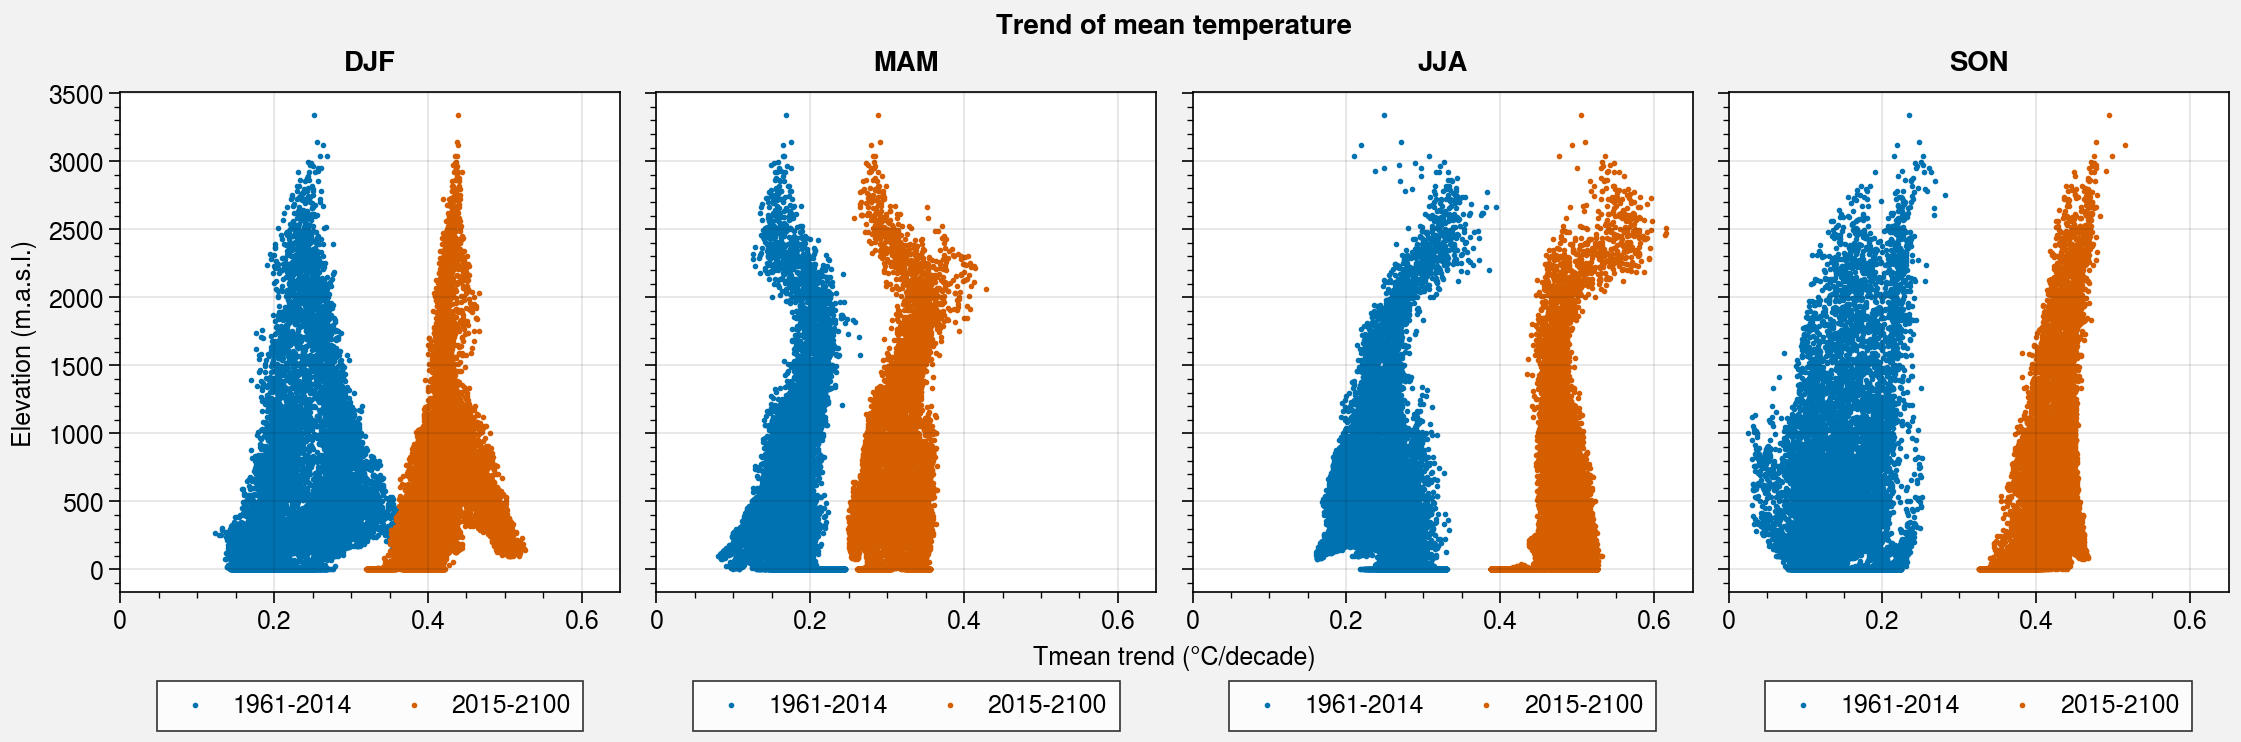

In [14]:
f, axs = pplt.subplots(ncols=4)
leg = ['1961-2014','2015-2100']
#blue_dot = 

for i in range(4):
    ax = axs[i]
    blue_dot = ax.scatter(10*slope_T_hist[i],ds.SH[jmin:jmax,imin:imax],s=2)
    ax.set_xlim((0.,0.65))
    #ax.legend(blue_dot,"Historic")
    
for i in range(4):
    ax = axs[i]
    orange_dot = ax.scatter(10*slope_T_fut[i],ds.SH[jmin:jmax,imin:imax],s=2)
    ax.set_xlim((0.,0.65))
#    ax.legend()

axs.format(suptitle='Trend of mean temperature',collabels=['DJF','MAM','JJA', 'SON'],xlabel='Tmean trend (°C/decade)',ylabel='Elevation (m.a.s.l.)')
axs.legend([blue_dot,orange_dot],leg,loc='bottom')

In [5]:
def detect_alps(H):
    nlat,nlon = np.shape(H)
    mask = np.bool8(np.zeros((nlat,nlon)))
    r = 4
    for j in range(r,nlat-r):
        for i in range(r,nlon-r):
            mask[j,i] = np.logical_and(H[j,i]>360 ,np.any(H[j-r:j+r,i-r:i+r]>1300))
            # mask[j,i] = np.std(H[j-r:j+r,i-r:i+r])>200
    return mask
alps = detect_alps(H)
alps[lon<4.8] = False
alps[np.logical_and(lon>10,lat<45.2)] = False

north_alps = np.copy(alps)
north_alps[lon>8.6] = False
north_alps[lat<45] = False
#north_alps[lat>46.5] = False

south_alps = np.copy(alps)
south_alps[lat>45] = False

east_alps = np.copy(alps)
east_alps[lon<8.6] = False

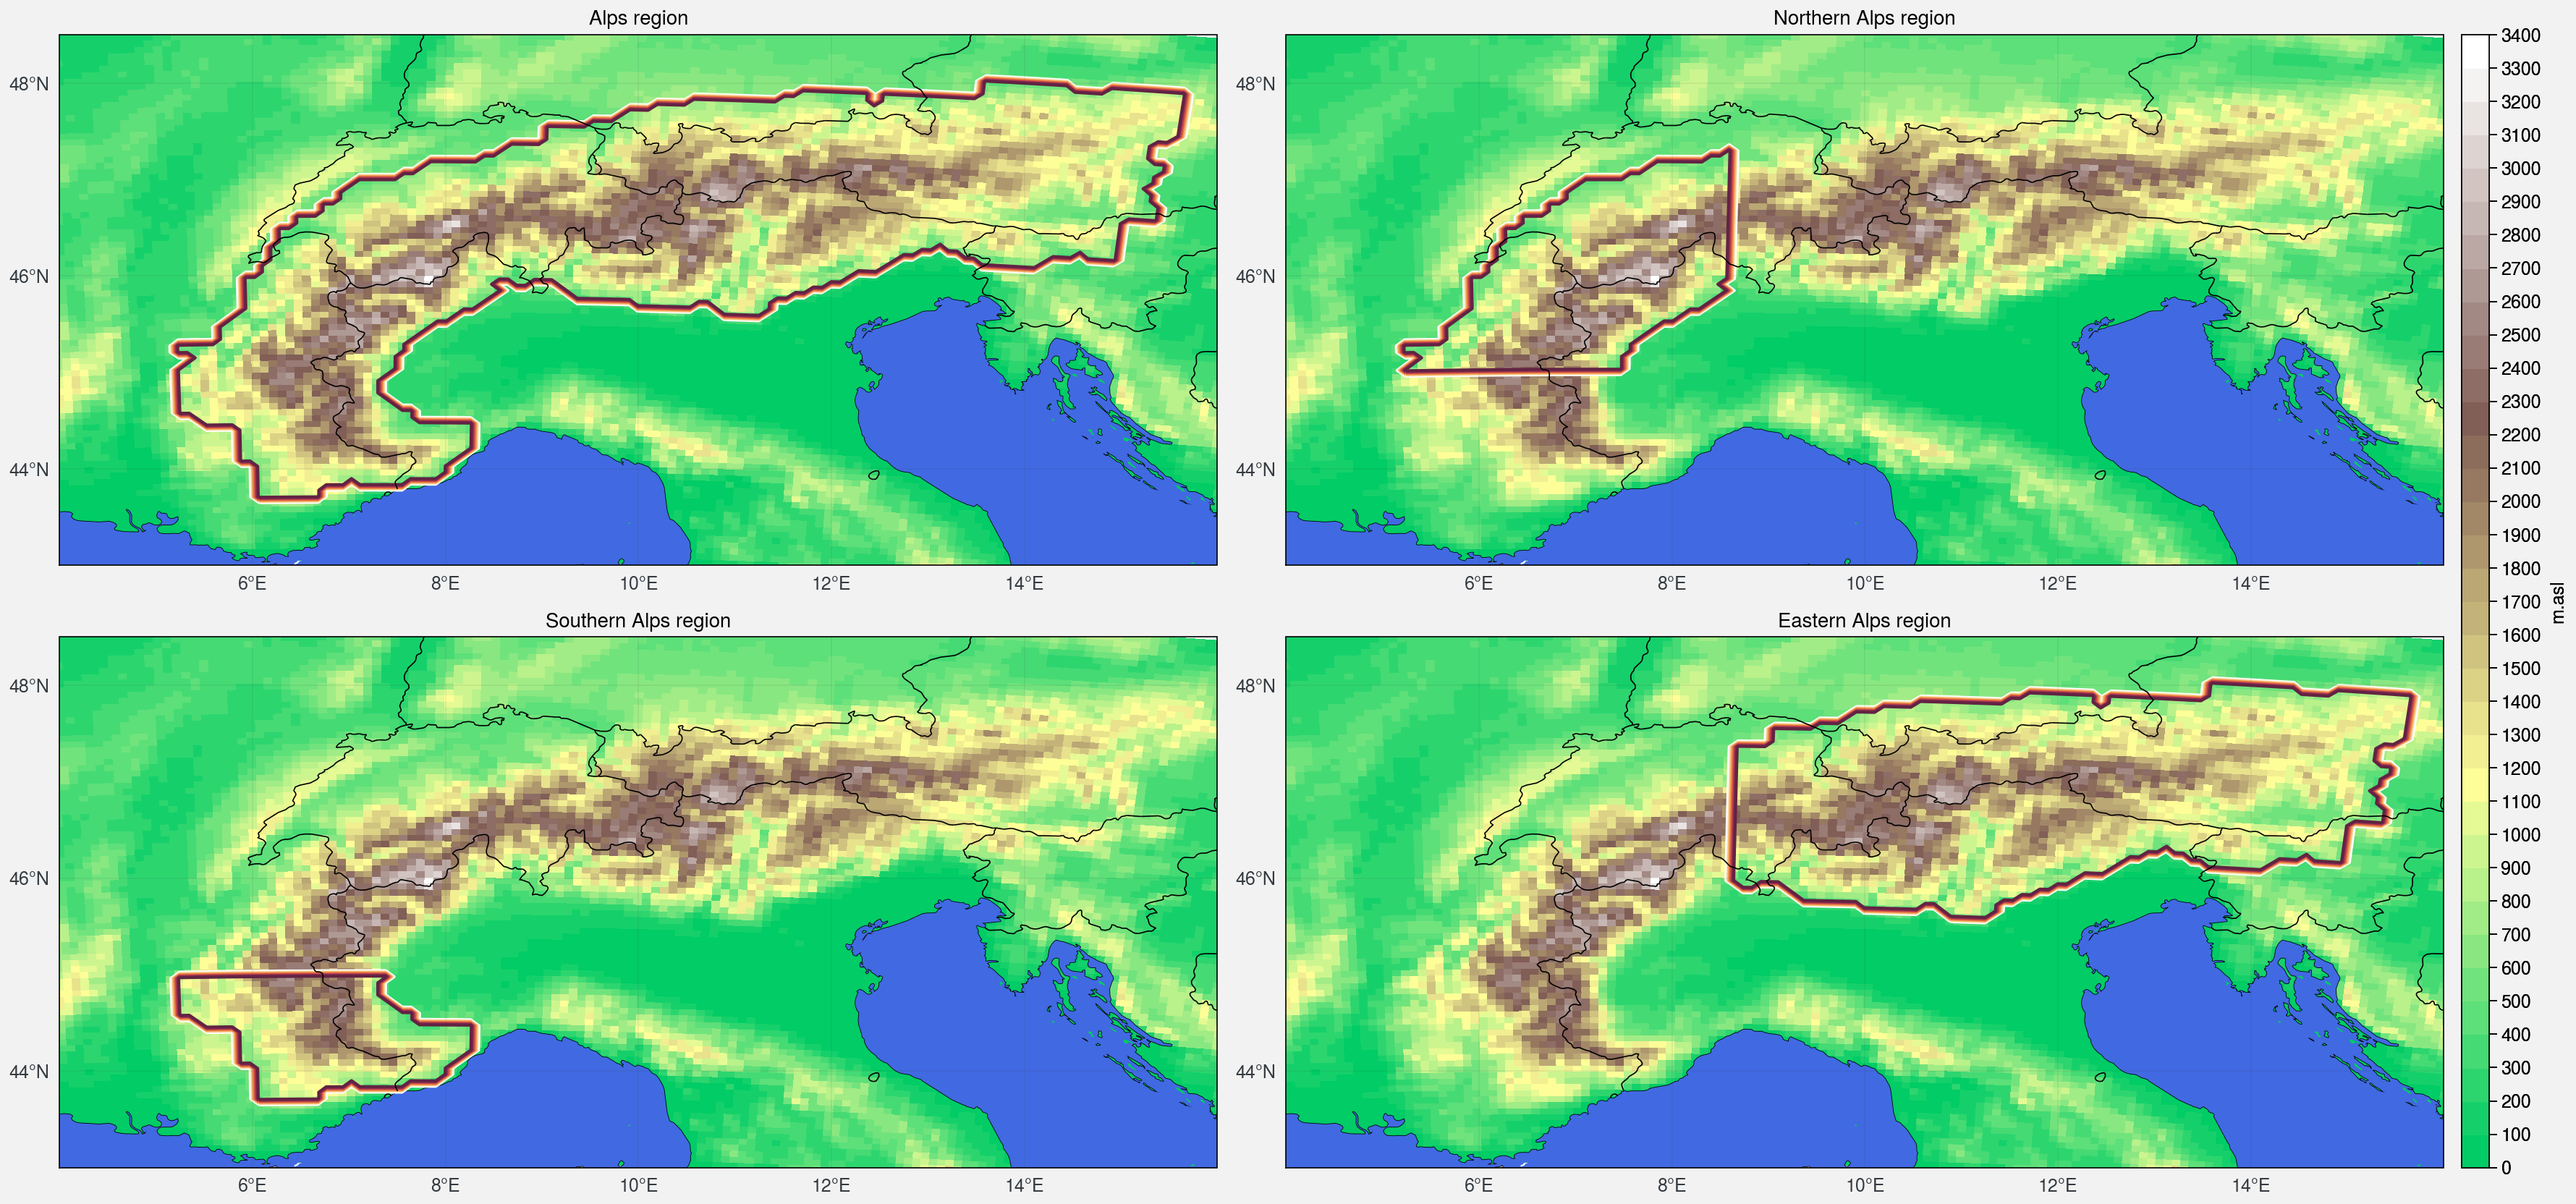

In [16]:
f, axs = pplt.subplots(proj='cyl', ncols=2, nrows=2, axwidth=8)

m=axs[0].pcolormesh(lon, lat, H, levels=34,cmap=colors_land)
f.colorbar(m,label= 'm.asl')
axs[0].contour(lon, lat,alps)
axs[0].format(**normal_format,title='Alps region')
axs[0].format(ocean=True,oceancolor='royalblue',reso='hi')#, latlim=[40.,51.],lonlim=[0.,20.])


m=axs[1].pcolormesh(lon, lat, H, levels=34,cmap=colors_land)
axs[1].contour(lon, lat,north_alps)
axs[1].format(**normal_format,title='Northern Alps region')
axs[1].format(ocean=True,oceancolor='royalblue',reso='hi')#, latlim=[40.,51.],lonlim=[0.,20.])


m=axs[2].pcolormesh(lon, lat, H, levels=34,cmap=colors_land)
axs[2].contour(lon, lat,south_alps)
axs[2].format(**normal_format,title='Southern Alps region')
axs[2].format(ocean=True,oceancolor='royalblue',reso='hi')#, latlim=[40.,51.],lonlim=[0.,20.])


m=axs[3].pcolormesh(lon, lat, H, levels=34,cmap=colors_land)
axs[3].contour(lon, lat,east_alps)
axs[3].format(**normal_format,title='Eastern Alps region')
axs[3].format(ocean=True,oceancolor='royalblue',reso='hi')#, latlim=[40.,51.],lonlim=[0.,20.])

#### Alps masks

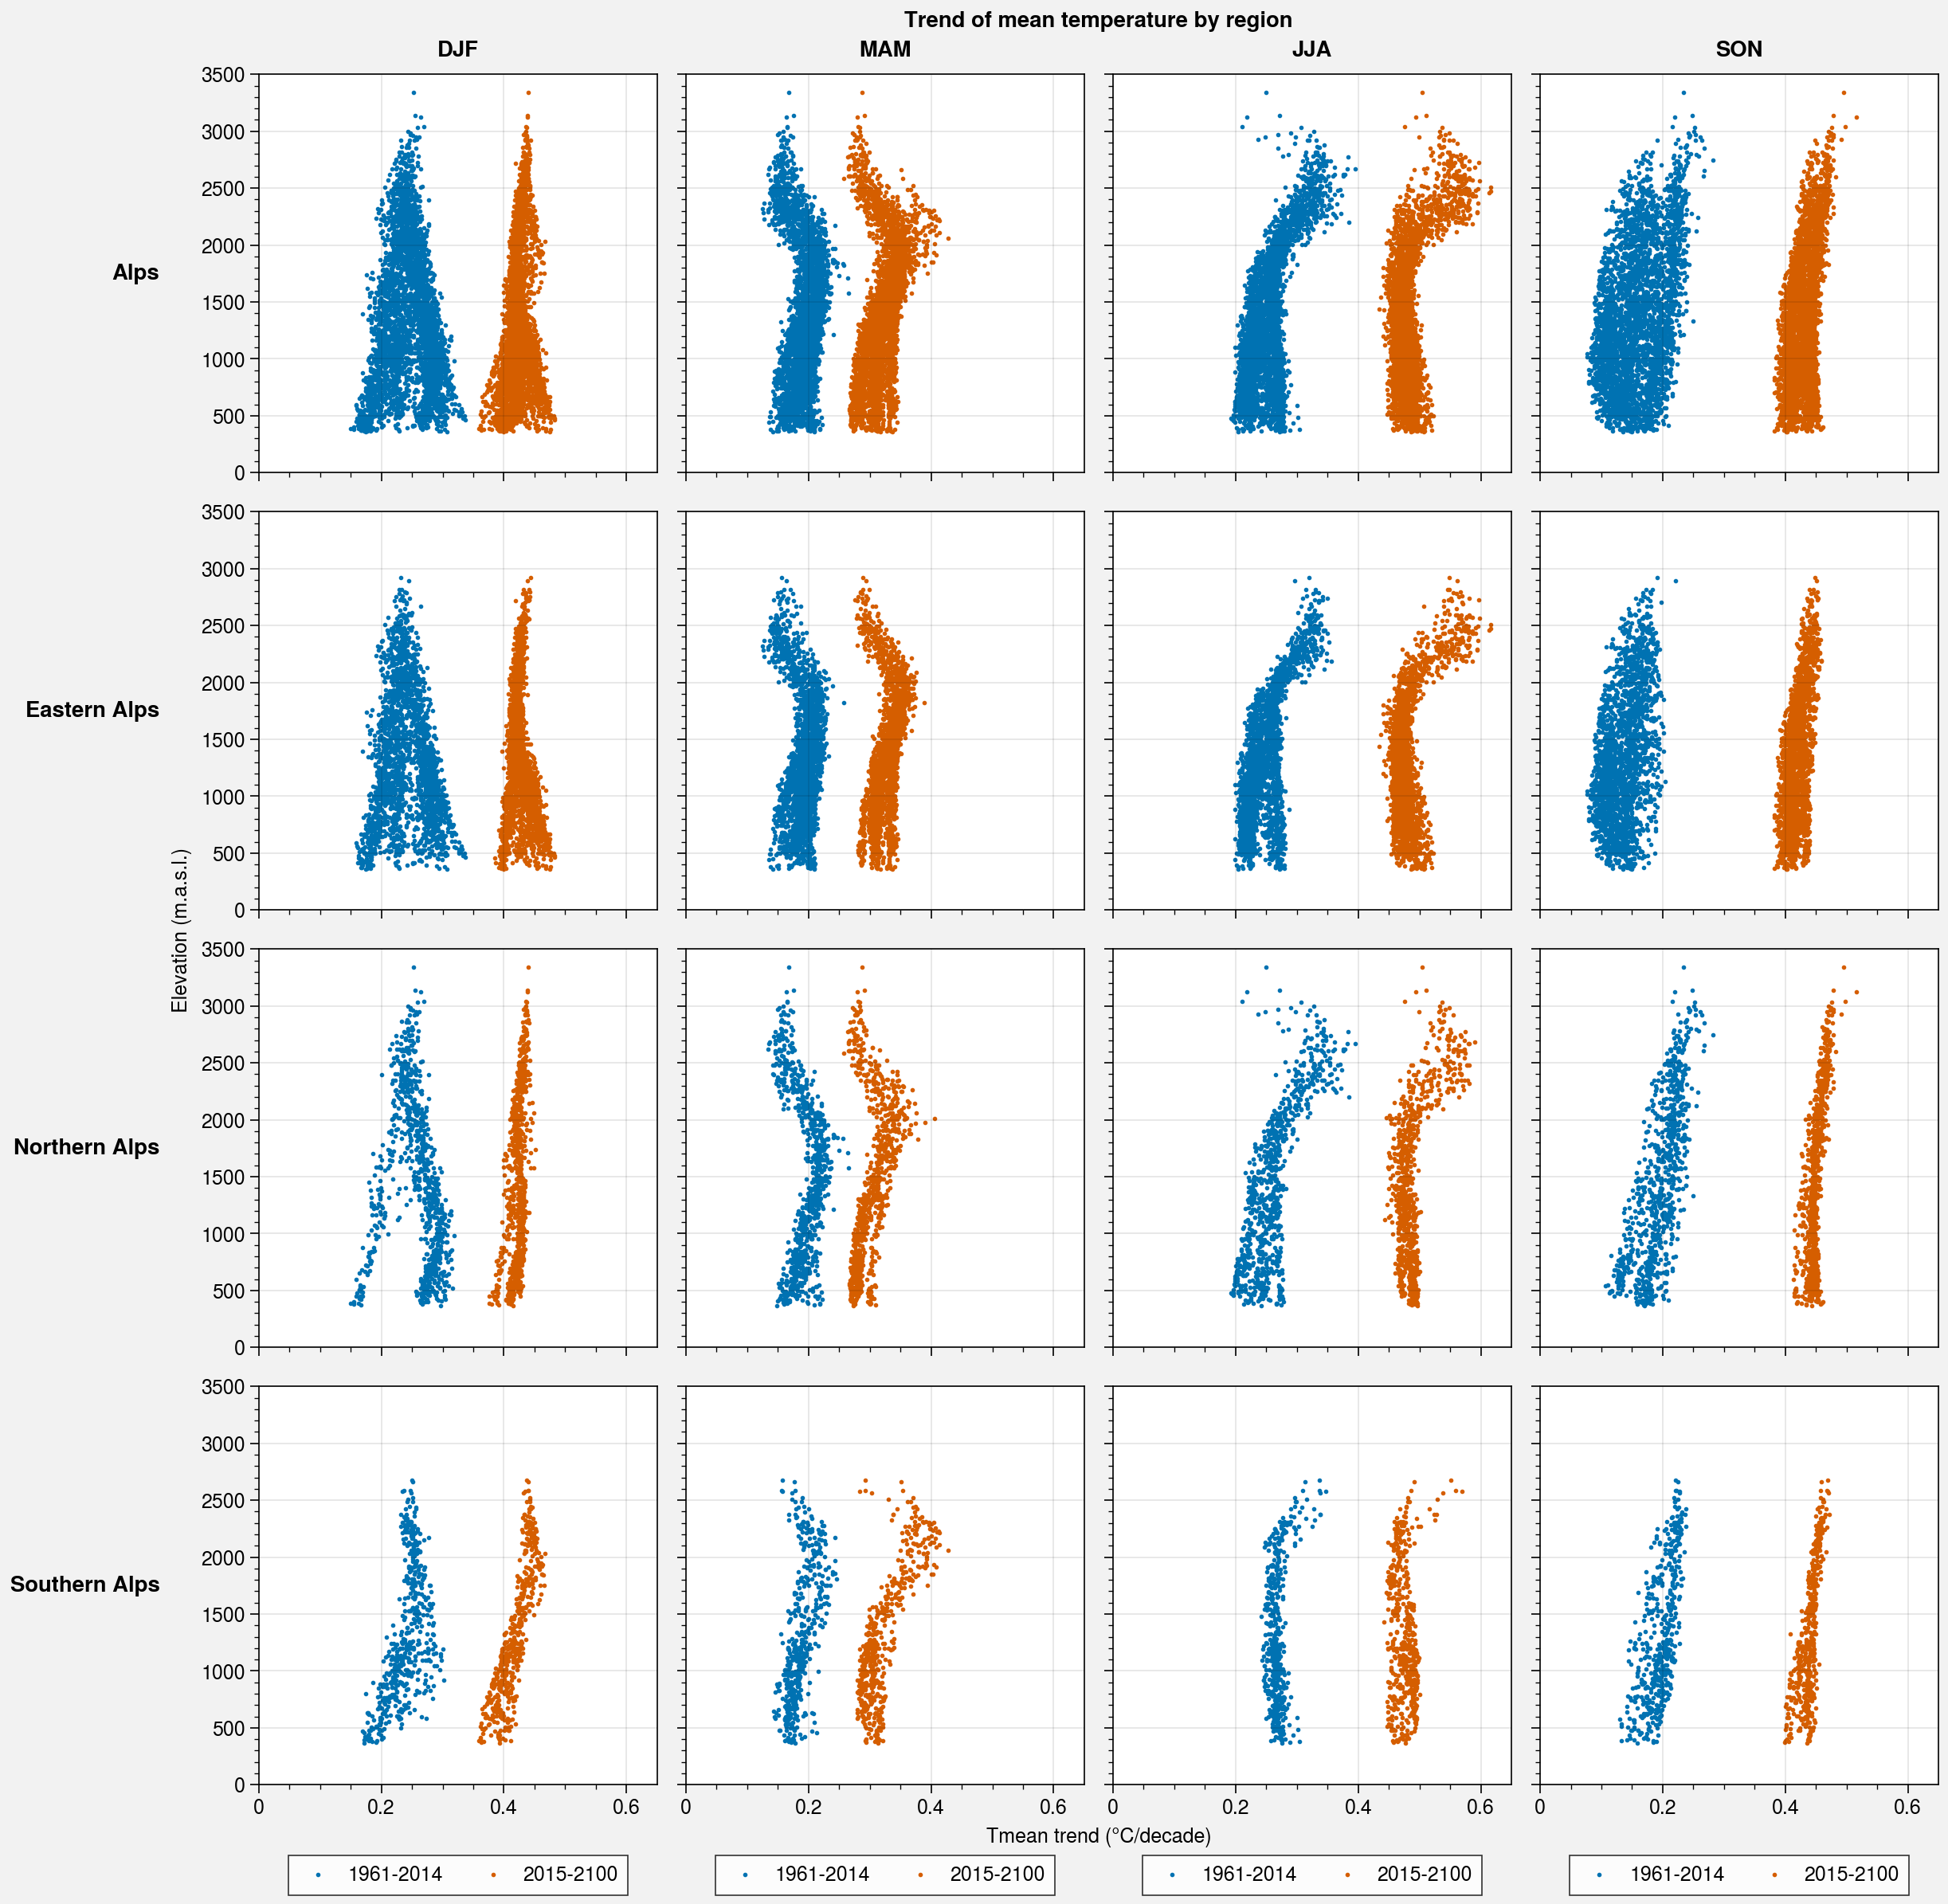

In [17]:
f, axs = pplt.subplots(ncols=4, nrows=4)
leg = ['1961-2014','2015-2100']

for i in range(4):
    slope_T_hist_alps = np.ma.masked_array(slope_T_hist[i], mask=np.invert(alps))
    slope_T_hist_east_alps = np.ma.masked_array(slope_T_hist[i], mask=np.invert(east_alps))
    slope_T_hist_north_alps = np.ma.masked_array(slope_T_hist[i], mask=np.invert(north_alps))
    slope_T_hist_south_alps = np.ma.masked_array(slope_T_hist[i], mask=np.invert(south_alps))
    slopes=[slope_T_hist_alps,slope_T_hist_east_alps,slope_T_hist_north_alps,slope_T_hist_south_alps]
    
    for j,slope in enumerate(slopes):
        ax = axs[i+4*j]
        blue_dot = ax.scatter(10*slope,ds.SH[jmin:jmax,imin:imax],s=2)
        
    
for i in range(4):
    slope_T_fut_alps = np.ma.masked_array(slope_T_fut[i], mask=np.invert(alps))
    slope_T_fut_east_alps = np.ma.masked_array(slope_T_fut[i], mask=np.invert(east_alps))
    slope_T_fut_north_alps = np.ma.masked_array(slope_T_fut[i], mask=np.invert(north_alps))
    slope_T_fut_south_alps = np.ma.masked_array(slope_T_fut[i], mask=np.invert(south_alps))
    slopes=[slope_T_fut_alps,slope_T_fut_east_alps,slope_T_fut_north_alps,slope_T_fut_south_alps]
    
    for j,slope in enumerate(slopes):
        ax = axs[i+4*j]
        orange_dot = ax.scatter(10*slope,ds.SH[jmin:jmax,imin:imax],s=2)
        ax.set_xlim((0.,0.65))
        ax.set_ylim((0.,3500))
        if(j==3):
            ax.legend([blue_dot,orange_dot],leg,loc='bottom')

axs.format(suptitle='Trend of mean temperature by region',collabels=['DJF','MAM','JJA', 'SON'],
           rowlabels=['Alps','Eastern Alps','Northern Alps','Southern Alps'],xlabel='Tmean trend (°C/decade)',ylabel='Elevation (m.a.s.l.)')
#axs.legend([blue_dot,orange_dot],leg,loc='bottom')
#import matplotlib.patches as mpatches
#axs.legend(handles=[ mpatches.Patch(color=[(1,0.5,0,1),(0,0,1,1)],label=leg) for i in range(2)],
#          fontsize=15, ncols=2, center=True, frame=False, loc='t')

#### Eastern Alps mask

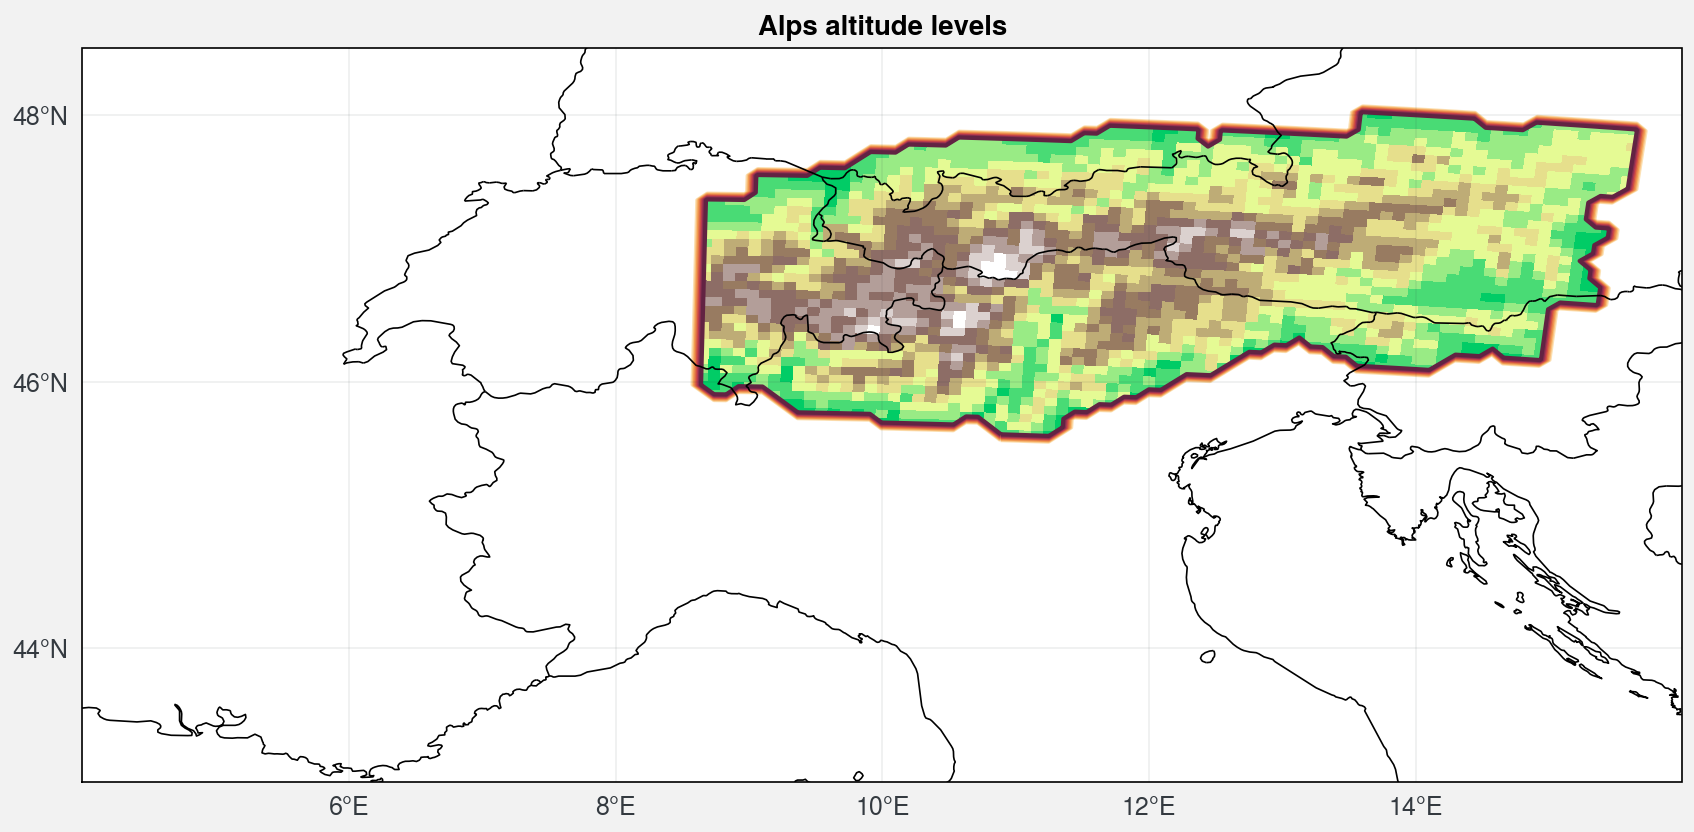

In [18]:
f, ax = pplt.subplots(proj='cyl', axwidth=8)

H_east_alps = np.ma.masked_array(H, mask=np.invert(east_alps))

ax.pcolormesh(lon, lat,H_east_alps,edgecolors='none',cmap=colors_land)
ax.contour(lon, lat,east_alps)
ax.format(**normal_format,suptitle='Alps altitude levels')


(<matplotlib.legend.Legend at 0x7f0c0b607f10>,
 <matplotlib.legend.Legend at 0x7f0c0b016e80>)

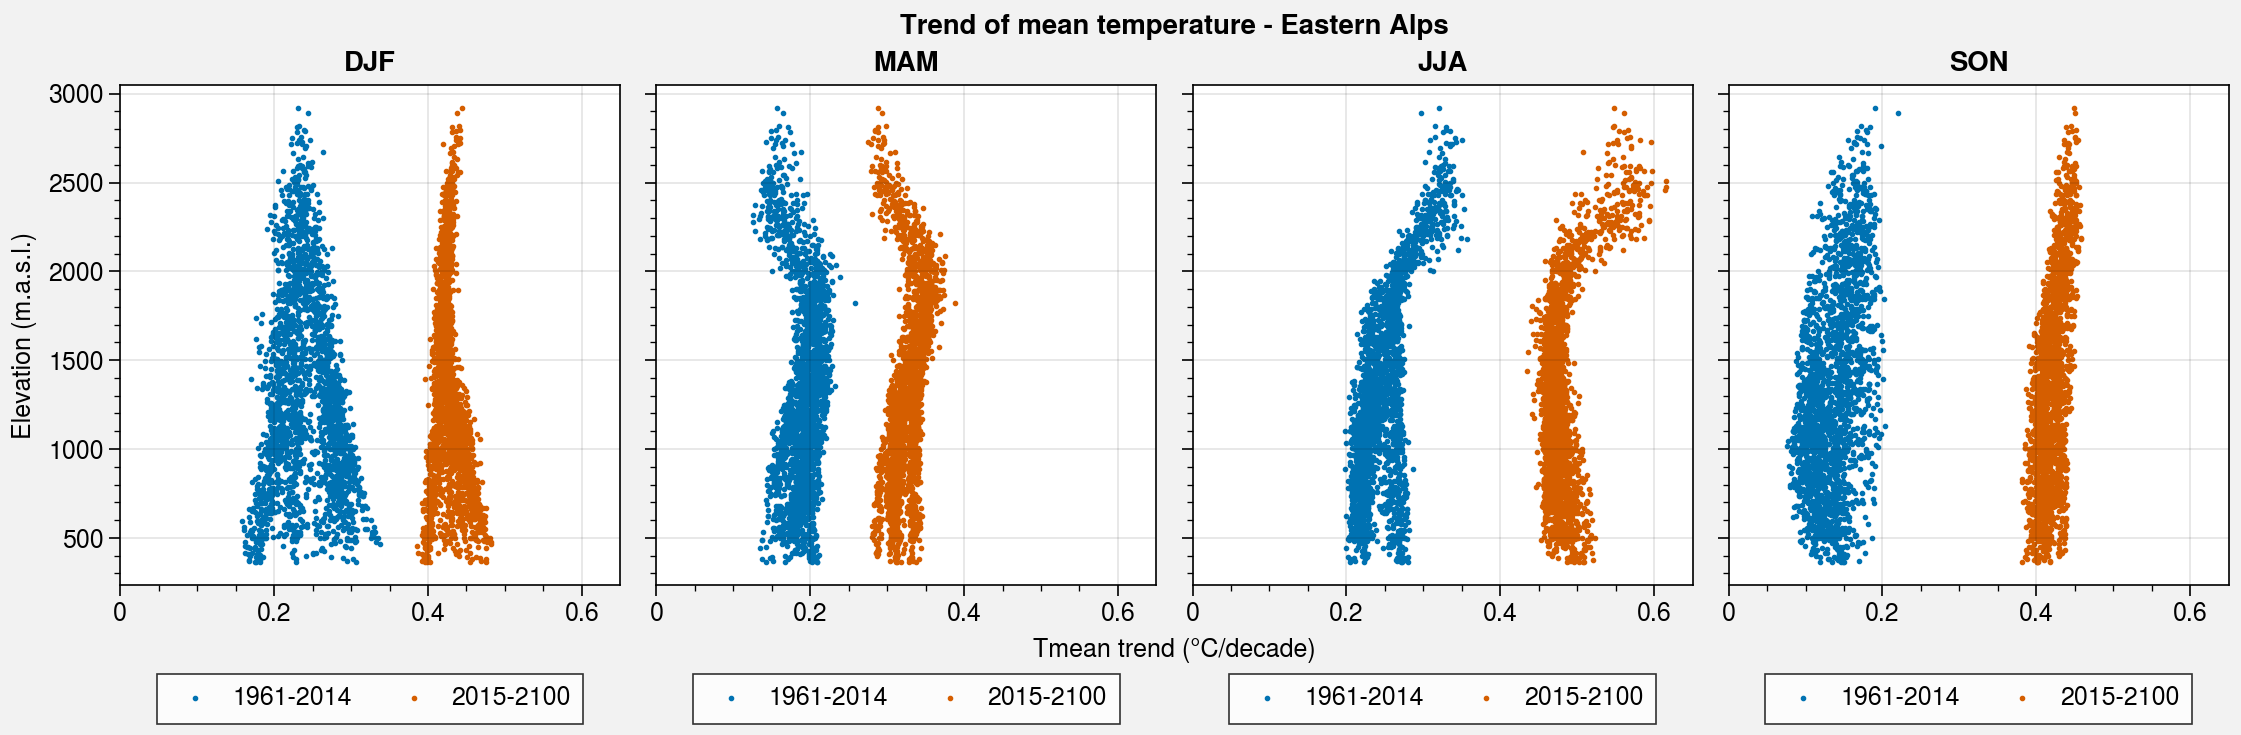

In [19]:
f, axs = pplt.subplots(ncols=4)
leg = ['1961-2014','2015-2100']

for i in range(4):
    slope_T_hist_east_alps = np.ma.masked_array(slope_T_hist[i], mask=np.invert(east_alps))
    
    ax = axs[i]
    blue_dot = ax.scatter(10*slope_T_hist_east_alps,H_east_alps,s=2)
    ax.set_xlim((0.,0.65))
    #ax.legend(blue_dot,"Historic")
    
for i in range(4):
    slope_T_fut_east_alps = np.ma.masked_array(slope_T_fut[i], mask=np.invert(east_alps))
    
    ax = axs[i]
    orange_dot = ax.scatter(10*slope_T_fut_east_alps,H_east_alps,s=2)
    ax.set_xlim((0.,0.65))
#    ax.legend()

axs.format(suptitle='Trend of mean temperature - Eastern Alps',collabels=['DJF','MAM','JJA', 'SON'],xlabel='Tmean trend (°C/decade)',ylabel='Elevation (m.a.s.l.)')
axs.legend([blue_dot,orange_dot],leg,loc='bottom')

#### Northern Alps mask

(<matplotlib.legend.Legend at 0x7f0c0ad4e280>,
 <matplotlib.legend.Legend at 0x7f0c0acc6310>)

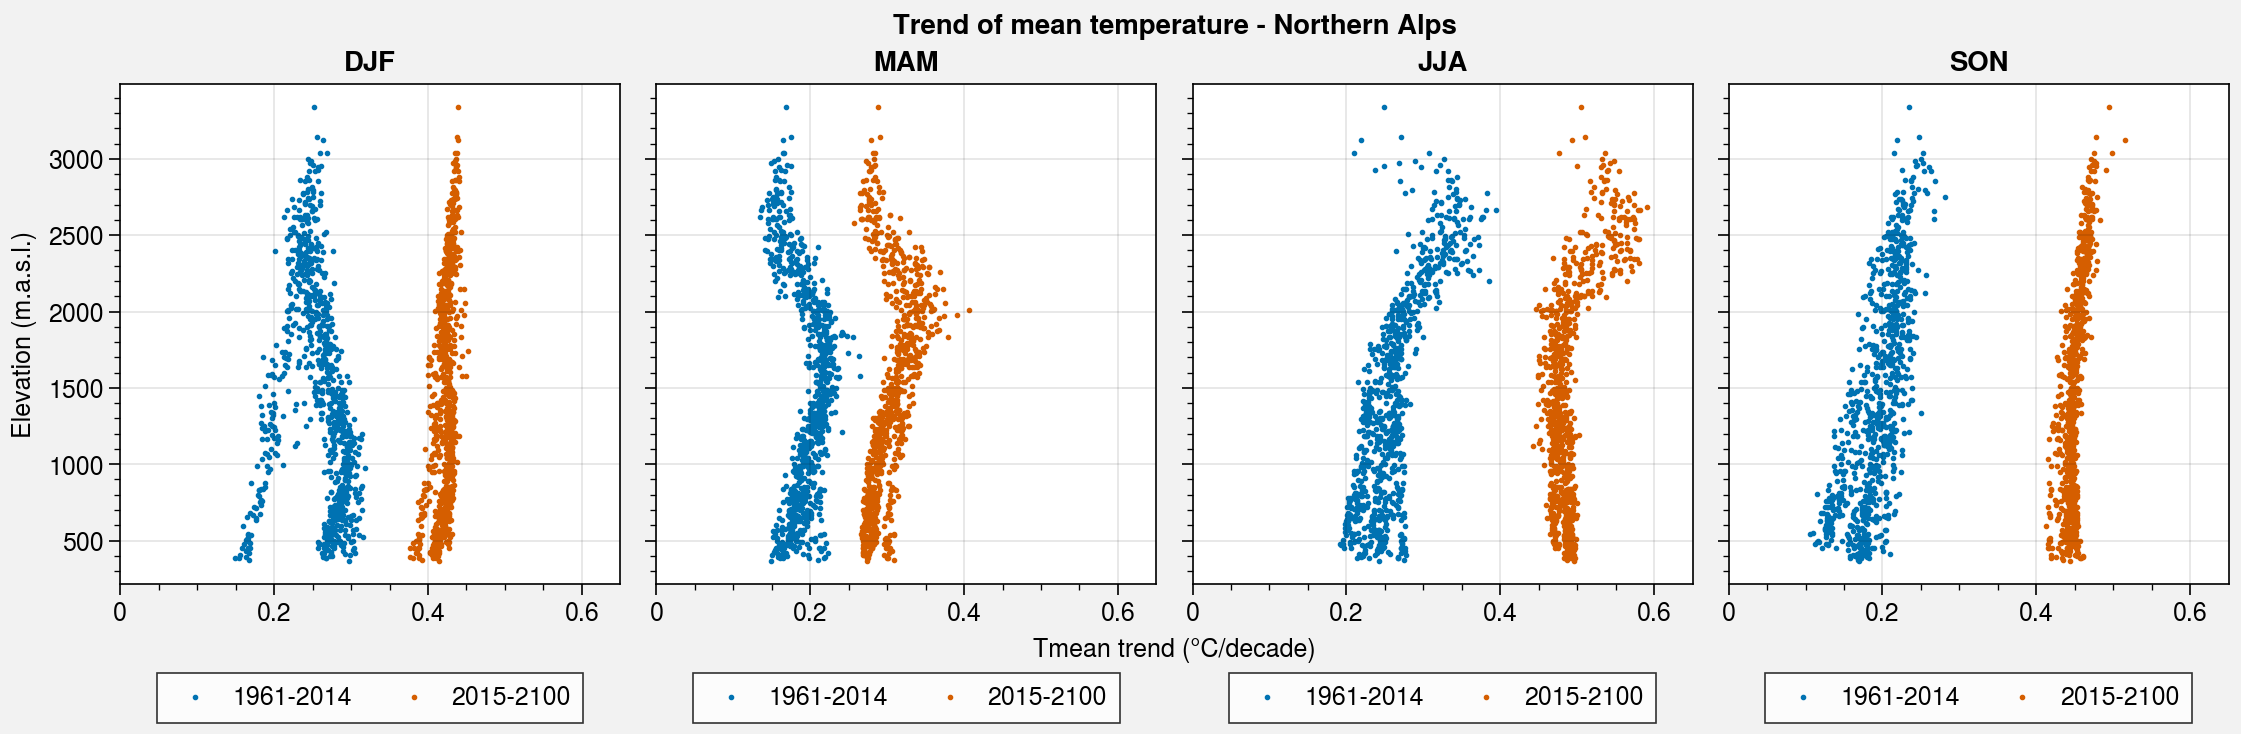

In [20]:
f, axs = pplt.subplots(ncols=4)
leg = ['1961-2014','2015-2100']

for i in range(4):
    slope_T_hist_north_alps = np.ma.masked_array(slope_T_hist[i], mask=np.invert(north_alps))
    
    ax = axs[i]
    blue_dot = ax.scatter(10*slope_T_hist_north_alps,ds.SH[jmin:jmax,imin:imax],s=2)
    ax.set_xlim((0.,0.65))
    #ax.legend(blue_dot,"Historic")
    
for i in range(4):
    slope_T_fut_north_alps = np.ma.masked_array(slope_T_fut[i], mask=np.invert(north_alps))
    
    ax = axs[i]
    orange_dot = ax.scatter(10*slope_T_fut_north_alps,ds.SH[jmin:jmax,imin:imax],s=2)
    ax.set_xlim((0.,0.65))
#    ax.legend()

axs.format(suptitle='Trend of mean temperature - Northern Alps',collabels=['DJF','MAM','JJA', 'SON'],xlabel='Tmean trend (°C/decade)',ylabel='Elevation (m.a.s.l.)')
axs.legend([blue_dot,orange_dot],leg,loc='bottom')

#### Southern Alps mask

(<matplotlib.legend.Legend at 0x7f0c0a9570d0>,
 <matplotlib.legend.Legend at 0x7f0c0a8ca6a0>)

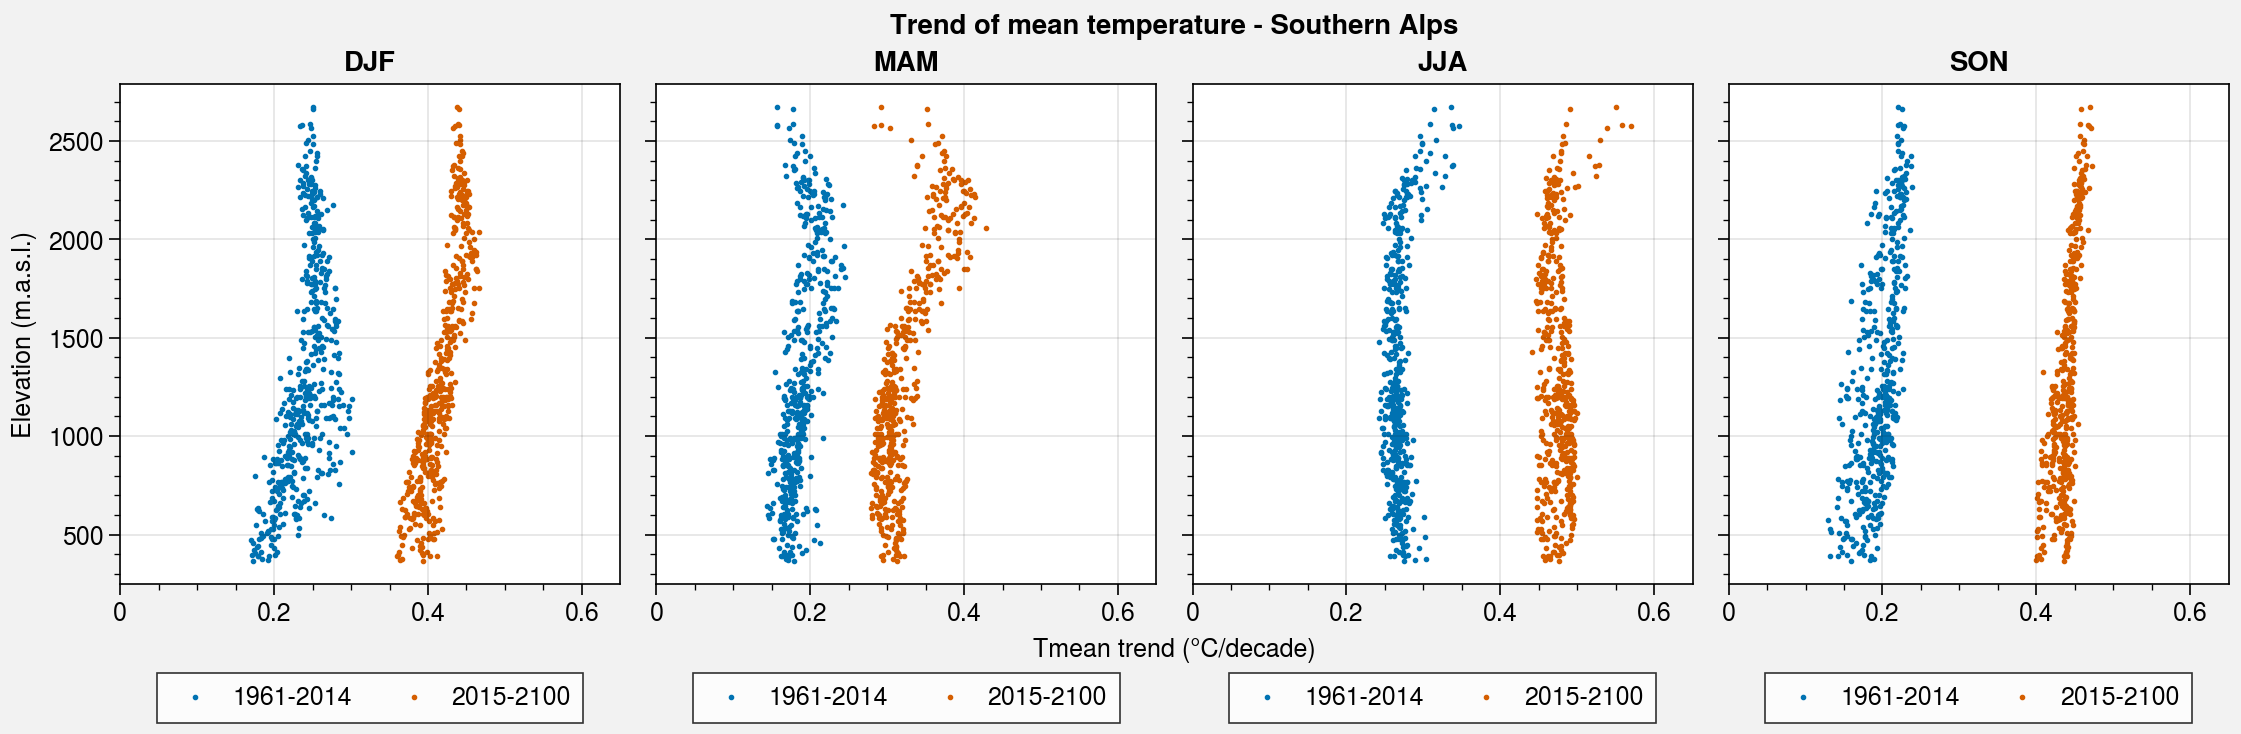

In [21]:
f, axs = pplt.subplots(ncols=4)
leg = ['1961-2014','2015-2100']

for i in range(4):
    slope_T_hist_south_alps = np.ma.masked_array(slope_T_hist[i], mask=np.invert(south_alps))
    
    ax = axs[i]
    blue_dot = ax.scatter(10*slope_T_hist_south_alps,ds.SH[jmin:jmax,imin:imax],s=2)
    ax.set_xlim((0.,0.65))
    #ax.legend(blue_dot,"Historic")
    
for i in range(4):
    slope_T_fut_south_alps = np.ma.masked_array(slope_T_fut[i], mask=np.invert(south_alps))
    
    ax = axs[i]
    orange_dot = ax.scatter(10*slope_T_fut_south_alps,ds.SH[jmin:jmax,imin:imax],s=2)
    ax.set_xlim((0.,0.65))
#    ax.legend()

axs.format(suptitle='Trend of mean temperature - Southern Alps',collabels=['DJF','MAM','JJA', 'SON'],xlabel='Tmean trend (°C/decade)',ylabel='Elevation (m.a.s.l.)')
axs.legend([blue_dot,orange_dot],leg,loc='bottom')

### Net Shortwave radiation trend

In [6]:
# SWD : Short Wave Down, SWU : Short Wave Up, NWS : Net Short Wave

wp_meanseason_meanSWD = np.load('/bettik/castelli/data/saved_data_MAR_ECEarth3/wp_meanseason_meanSWD.npy')[:,:,jmin:jmax,imin:imax]
wp_meanseason_meanSWU = np.load('/bettik/castelli/data/saved_data_MAR_ECEarth3/wp_meanseason_meanSWU.npy')[:,:,jmin:jmax,imin:imax]

wp_meanseason_meanNSW = wp_meanseason_meanSWD - wp_meanseason_meanSWU

wp_meanseason_meanNSW_hist = wp_meanseason_meanT[:54,:,:,:]
wp_meanseason_meanNSW_fut = wp_meanseason_meanT[55:,:,:,:]

origin_NSW_hist=np.full(wp_meanseason_meanNSW_hist.shape[1:4],np.nan)
slope_NSW_hist=np.full(wp_meanseason_meanNSW_hist.shape[1:4],np.nan)
pvalue_NSW_hist=np.full(wp_meanseason_meanNSW_hist.shape[1:4],np.nan)

origin_NSW_fut=np.full(wp_meanseason_meanNSW_fut.shape[1:4],np.nan)
slope_NSW_fut=np.full(wp_meanseason_meanNSW_fut.shape[1:4],np.nan)
pvalue_NSW_fut=np.full(wp_meanseason_meanNSW_fut.shape[1:4],np.nan)

for i in range(wp_meanseason_meanNSW_fut.shape[3]):
    # print(str(lon)+'/'+str(les_season_maxT.shape[3]),end=' ')
    for j in range(wp_meanseason_meanNSW_fut.shape[2]):
        for season in range(4):
            linregress_NSW_hist = linregress(np.arange(wp_meanseason_meanNSW_hist.shape[0]), wp_meanseason_meanNSW_hist[:,season,j,i])
            origin_NSW_hist[season][j][i] = linregress_NSW_hist.intercept
            slope_NSW_hist[season][j][i] = linregress_NSW_hist.slope
            pvalue_NSW_hist[season][j][i] = linregress_NSW_hist.pvalue
            
            linregress_NSW_fut = linregress(np.arange(wp_meanseason_meanNSW_fut.shape[0]), wp_meanseason_meanNSW_fut[:,season,j,i])
            origin_NSW_fut[season][j][i] = linregress_NSW_fut.intercept
            slope_NSW_fut[season][j][i] = linregress_NSW_fut.slope
            pvalue_NSW_fut[season][j][i] = linregress_NSW_fut.pvalue

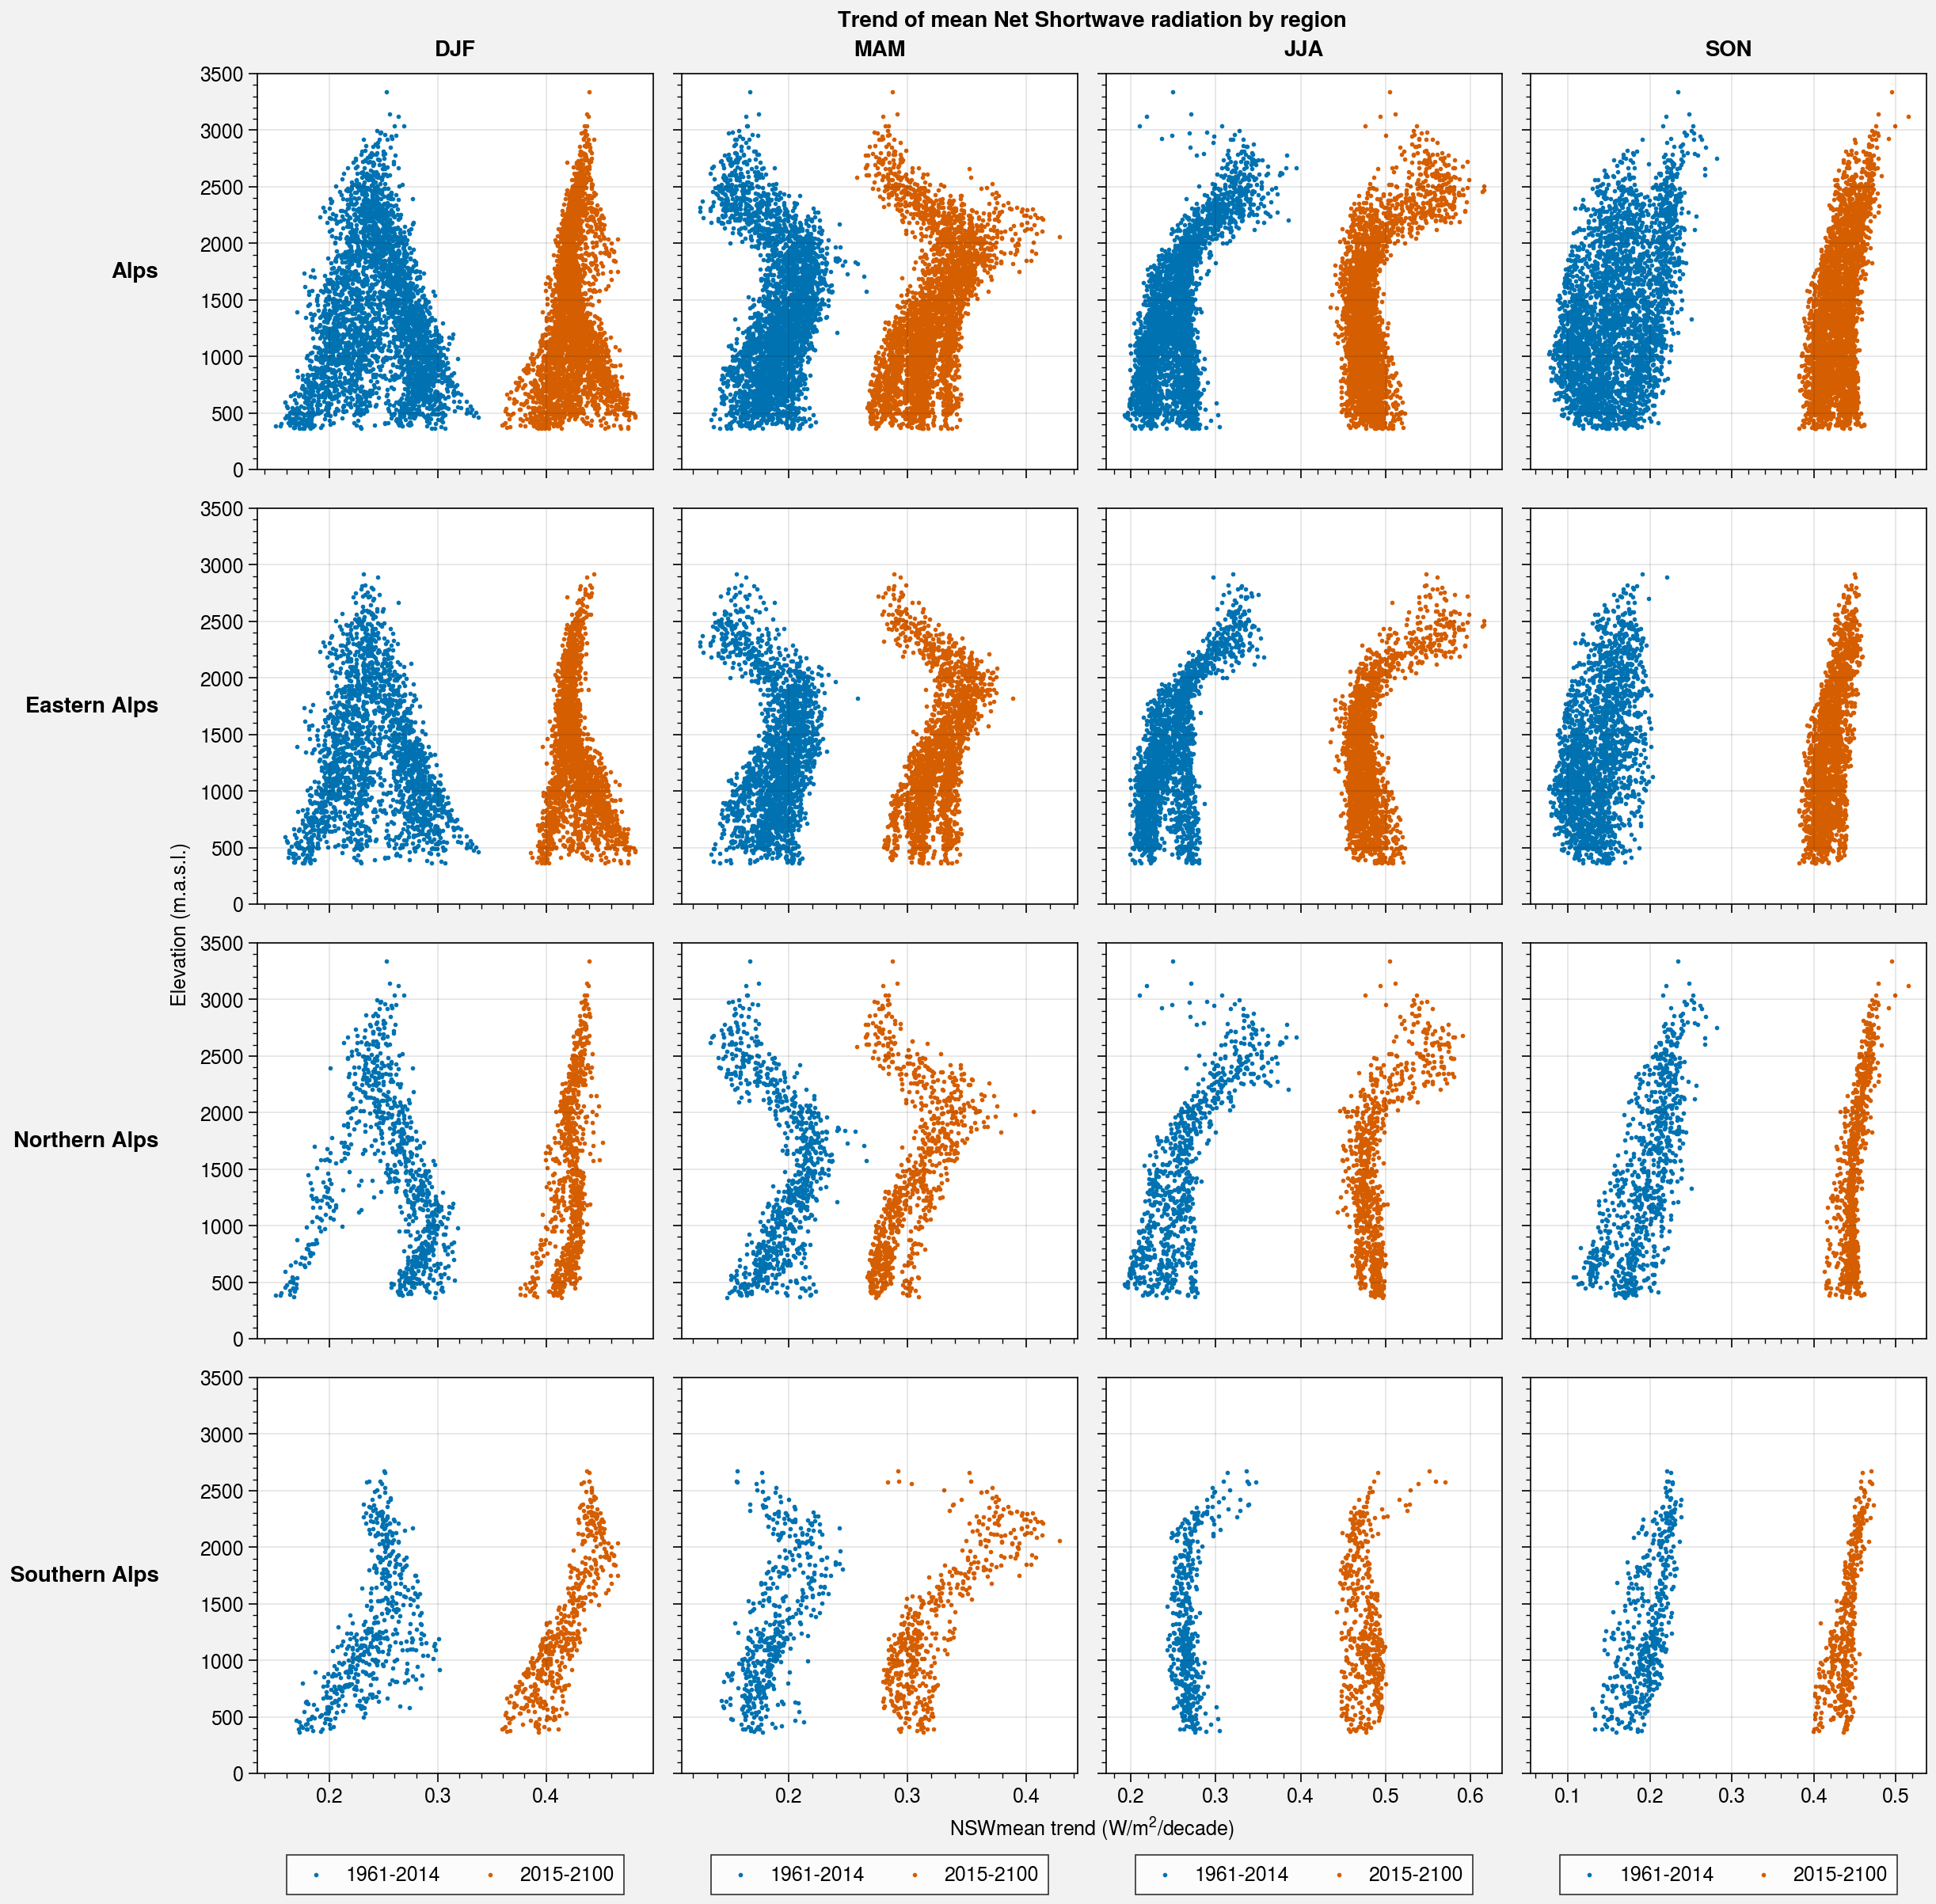

In [7]:
f, axs = pplt.subplots(ncols=4, nrows=4)
leg = ['1961-2014','2015-2100']

for i in range(4):
    slope_NSW_hist_alps = np.ma.masked_array(slope_NSW_hist[i], mask=np.invert(alps))
    slope_NSW_hist_east_alps = np.ma.masked_array(slope_NSW_hist[i], mask=np.invert(east_alps))
    slope_NSW_hist_north_alps = np.ma.masked_array(slope_NSW_hist[i], mask=np.invert(north_alps))
    slope_NSW_hist_south_alps = np.ma.masked_array(slope_NSW_hist[i], mask=np.invert(south_alps))
    slopes=[slope_NSW_hist_alps,slope_NSW_hist_east_alps,slope_NSW_hist_north_alps,slope_NSW_hist_south_alps]
    
    for j,slope in enumerate(slopes):
        ax = axs[i+4*j]
        blue_dot = ax.scatter(10*slope,ds.SH[jmin:jmax,imin:imax],s=2)
        
    
for i in range(4):
    slope_NSW_fut_alps = np.ma.masked_array(slope_NSW_fut[i], mask=np.invert(alps))
    slope_NSW_fut_east_alps = np.ma.masked_array(slope_NSW_fut[i], mask=np.invert(east_alps))
    slope_NSW_fut_north_alps = np.ma.masked_array(slope_NSW_fut[i], mask=np.invert(north_alps))
    slope_NSW_fut_south_alps = np.ma.masked_array(slope_NSW_fut[i], mask=np.invert(south_alps))
    slopes=[slope_NSW_fut_alps,slope_NSW_fut_east_alps,slope_NSW_fut_north_alps,slope_NSW_fut_south_alps]
    
    for j,slope in enumerate(slopes):
        ax = axs[i+4*j]
        orange_dot = ax.scatter(10*slope,ds.SH[jmin:jmax,imin:imax],s=2)
        #ax.set_xlim((0.,0.65))
        ax.set_ylim((0.,3500))
        if(j==3):
            ax.legend([blue_dot,orange_dot],leg,loc='bottom')

axs.format(suptitle='Trend of mean Net Shortwave radiation by region',collabels=['DJF','MAM','JJA', 'SON'],
           rowlabels=['Alps','Eastern Alps','Northern Alps','Southern Alps'],xlabel='NSWmean trend (W/$m^2$/decade)',ylabel='Elevation (m.a.s.l.)')